# Trivago case study

## case description

### Task 1

**Data exploration and visualization**


An essential part of this Data analyst role is to have a strong understanding of our ETL
pipelines and data coming from our partners. With this initial task we would like you to show 
us your analytical skills and ability to transform data into actionable insights that can be used 
by our strategy and leadership team.
For this task we have provided two datasets 
coming from our Whitelabel implementations. 
These implementations allow third parties to use 
trivago’s infrastructure to offer accomodation 
searches in their pages. One example you can 
test by yourself can be found in 
www.bandsintown.com while you search for 
concerts. 


The first of the mentioned datasets contains clickouts/referrals information coming from these 
implementations while the second has booking confirmations. Note that we earn certain 
revenue per each clickout sent from our partners and we agreed to split the revenue 
depending on the quality of traffic our partner sends us. The less quality the partner send us, 
then their revenue share is smaller. 
For this task, we want you to transform the mentioned datasets in a report/dashboard that 
answers the following questions: 


1. What is the quality of traffic we are getting from these whitelabel implementations? It is up to you to define what is “quality traffic” in this case but make sure you explain your decision. 

2. What campaigns/partners are performing better in terms of clickouts, bookings, traffic quality and total value?

3. Is there any difference in the performance by device type? Why is this important for trivago and our partners?

4. What suggestions would you have to improve the performance of our whitelabel implementations


The expected output for this task 1 should be in the form of a report/dashboard (in pdf or 
similar formats) with our leadership/strategic team being the target audience

### data_set description

**wl_Clickout_Sample** 

This file contains sample data attributed to the user clickouts done in our Whitelabel products. Note that each row of the sample is one clickout. The columns of this dataset are:

•   WL_partner – trivago’s partner the click is attributed to.

•   Locale – The geographical platform this click has come from (.co.uk = UK).

•   session_id – The ID given to each user’s unique session.

•   hotel_id – The ID given to the hotel that was clicked on by the user.

•   device_id – The id of the user’s device.

•   departure_days – Days left until the date of departure that was selected by the user.

•   arrival_days – Days left until the date of arrival that was selected by the user.

•   revenue – The amount of revenue attributed to the click.

•   click_id – The unique id of each click.

•   period – The period of time in which the click was made.


----------------------------------------------------------------------------------------------------------------------

**WL_Booking_Sample**

This file contains sample data of the bookings done by users that used our Whitelabel products. Note that each row of the sample is one booking. The columns of this dataset are:

•	transaction_value – The amount of money (in euros) that the booking is worth.

•	click_id – The unique id of each click from which the booking was made.

•	property_type – The type of property that has been booked.

•	period – The period of time in which the booking was made.


## Data preparation

In [1]:
import pandas as pd

In [2]:
clickout = pd.read_csv('wl_clickout_sample.csv')

In [3]:
booking  = pd.read_csv('wl_booking_sample.csv')

In [4]:
clickout.head()

,WL_partner,locale,session_id,hotel_id,device_id,departure_days,arrival_days,revenue,click_id,period
0,A,US,2021112922610036461,222240,3,283,282,31.70,0cf74b91-8601-47f4-a7d7-e72ba56de031,period-6
1,A,US,2021112902030026666,4118624,27,19,18,47.70,09cbb121-32d3-4e64-ab40-63399d525b00,period-6
2,A,DE,2021112902090036586,48544592,42,36,27,21.20,2c1bddc6-284f-40d7-a54d-1a697d178499,period-6
3,A,UK,2021112919730105838,3681740,30,32,31,9.95,c08aff24-e634-4ad5-a9a4-6bc2dba5fb92,period-6
4,A,UK,2021112919730105838,27251384,30,32,31,27.95,87eca29d-3e06-4a85-8fac-3d66b594a221,period-6


In [5]:
clickout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834256 entries, 0 to 834255
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   WL_partner      834256 non-null  object 
 1   locale          834256 non-null  object 
 2   session_id      834256 non-null  int64  
 3   hotel_id        834256 non-null  int64  
 4   device_id       834256 non-null  int64  
 5   departure_days  834256 non-null  int64  
 6   arrival_days    834256 non-null  int64  
 7   revenue         834256 non-null  float64
 8   click_id        834256 non-null  object 
 9   period          834256 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 63.6+ MB


seems like their no missings in this dataset, at the same time he formats of columns are also seem to be correct 

In [6]:
booking.head()

,transaction_value,period,property_type,click_id
0,102.55,period-6,alternative accomodation,324a9f0f-79b4-4e70-8e7f-da7b7680090f
1,188.90,period-6,hotel,dd17ca00-2cd2-4112-b994-42377ec5b05a
2,161.93,period-6,hotel,97692de6-614e-4934-a83d-f65a03b95922
3,683.66,period-6,alternative accomodation,970d7c0c-bc2e-4198-98f6-7ee617459b49
4,333.21,period-6,hotel,a0b5a803-5ad6-46d4-b100-2384a8b6ad6b


In [7]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3471 entries, 0 to 3470
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_value  3471 non-null   float64
 1   period             3471 non-null   object 
 2   property_type      3471 non-null   object 
 3   click_id           3471 non-null   object 
dtypes: float64(1), object(3)
memory usage: 108.6+ KB


In [8]:
booking['click_id'].nunique()

3280

So, not every record in WL_Booking_Sample is unique, the question is - how many are their duplicates or maybe it is jyst multiply booking per one click 

In [9]:
booking.duplicated().sum()

28

In [10]:
booking[booking.duplicated(keep=False)]

,transaction_value,period,property_type,click_id
19,351.62,period-6,hotel,847246ae-0ae9-4390-87a5-540f4e7c08d5
20,351.62,period-6,hotel,847246ae-0ae9-4390-87a5-540f4e7c08d5
146,238.34,period-4,alternative accomodation,9406e687-751e-42c1-a351-4d16e3bdac67
147,238.34,period-4,alternative accomodation,9406e687-751e-42c1-a351-4d16e3bdac67
219,391.45,period-4,hotel,9726881c-b200-4aed-80ba-e9997148e79b
220,391.45,period-4,hotel,9726881c-b200-4aed-80ba-e9997148e79b
306,211.50,period-4,hotel,b88ba1c2-7355-472c-8289-7cee07188c38
307,211.50,period-4,hotel,b88ba1c2-7355-472c-8289-7cee07188c38
387,154.77,period-4,other,8b295257-821c-4242-a756-9d4621342178
388,154.77,period-4,other,8b295257-821c-4242-a756-9d4621342178


I think it could be a mistake, when person makes a booking, then returns back and make it once again, so i feel free to drop them 

In [11]:
booking = booking.drop_duplicates(keep='first')

In [12]:
booking.duplicated().sum()

0

In [13]:
ratio = round(len(booking)/len(clickout) * 100, 3)

In [14]:
print("The % of booking from all clickouts is {}".format(ratio))

The % of booking from all clickouts is 0.413


## data analysis

1. I assume that quality of traffic in this case should describe the convertion of clickouts to bookings. 
why? - here is the simplest explanation: wrong or low-quality traffic often means, that the people who are brought to the web page (in this case with booking option) usually have another interests. For example - i am quit often redirected to such pages after trying to buy a ticket for a plane. Normally, it is going very close to each other, but in my case i have a place to stay in many destinations, so i don't need any accomodation. 

so here is an easy task - try to understand which of WL_partners brought the comany more bookings. 

In [15]:
check_of_crossings = pd.merge(booking,clickout,on='click_id')

In [16]:
check_of_crossings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3168
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_value  3169 non-null   float64
 1   period             3169 non-null   object 
 2   property_type      3169 non-null   object 
 3   click_id           3169 non-null   object 
 4   WL_partner         3169 non-null   object 
 5   locale             3169 non-null   object 
 6   session_id         3169 non-null   int64  
 7   hotel_id           3169 non-null   int64  
 8   device_id          3169 non-null   int64  
 9   departure_days     3169 non-null   int64  
 10  arrival_days       3169 non-null   int64  
 11  revenue            3169 non-null   float64
 12  period             3169 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 346.6+ KB


There are indeed crossings between two tables, so we can assume, that clickout in one table signals about some bookings

In [17]:
list_of_bookings_clicks = check_of_crossings['click_id'].to_list()

In [18]:
clickout['success'] = booking['click_id'].isin(list_of_bookings_clicks)

In [19]:
clickout.head()

,WL_partner,locale,session_id,hotel_id,device_id,departure_days,arrival_days,revenue,click_id,period,success
0,A,US,2021112922610036461,222240,3,283,282,31.70,0cf74b91-8601-47f4-a7d7-e72ba56de031,period-6,True
1,A,US,2021112902030026666,4118624,27,19,18,47.70,09cbb121-32d3-4e64-ab40-63399d525b00,period-6,True
2,A,DE,2021112902090036586,48544592,42,36,27,21.20,2c1bddc6-284f-40d7-a54d-1a697d178499,period-6,True
3,A,UK,2021112919730105838,3681740,30,32,31,9.95,c08aff24-e634-4ad5-a9a4-6bc2dba5fb92,period-6,False
4,A,UK,2021112919730105838,27251384,30,32,31,27.95,87eca29d-3e06-4a85-8fac-3d66b594a221,period-6,True


In [20]:
pivot_table_success = clickout.groupby('WL_partner').agg({'success': 'sum', 'click_id': 'count', 'revenue': 'sum'}).reset_index()

In [21]:
pivot_table_success['ratio'] = pivot_table_success['success'] / pivot_table_success['click_id']

In [22]:
pivot_table_success['RPC'] = pivot_table_success['revenue'] / pivot_table_success['click_id']

In [23]:
pd.options.display.float_format = '{:.5f}'.format

In [24]:
pivot_table_success.sort_values('ratio', ascending = False)

,WL_partner,success,click_id,revenue,ratio,RPC
0,A,2210,432640,13852894.49991,0.00511,32.01945
3,D,640,195755,5887062.50002,0.00327,30.07363
1,B,319,102859,3243805.55001,0.00310,31.53643
2,C,0,103002,3105475.40001,0.00000,30.14966


So, what we can see here - the highest number of succesfull bookings are brought by parther A - 2210. Also the ratio of overall clicks and successfull booking is the highest for partner A. The RPC (revenue per click) is also highest for prtner A The wickest partner with low quality traffic is partner C - just 0 bookings from 100 000 views - terrible. 

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

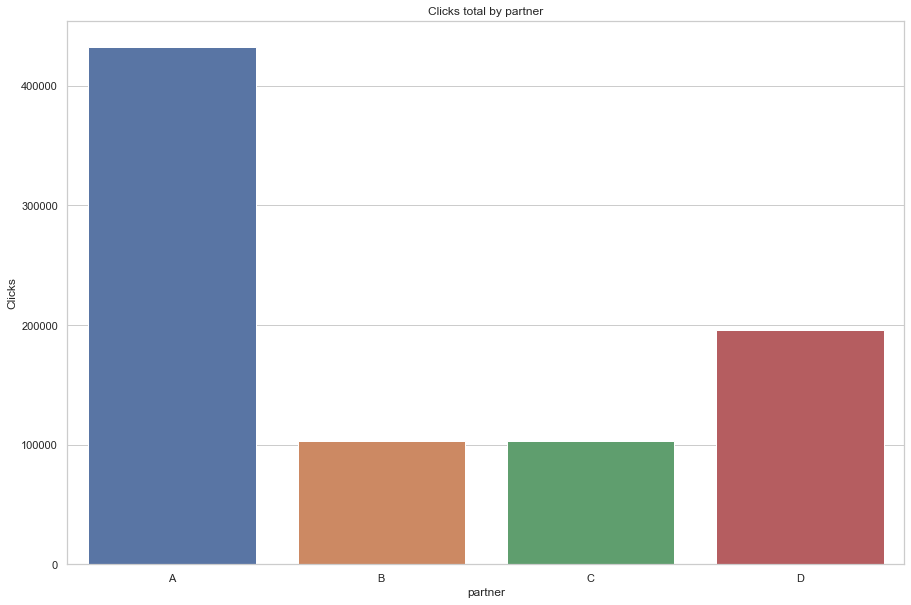

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="WL_partner", y="click_id", data=pivot_table_success)
plt.title('Clicks total by partner')
plt.xlabel('partner')
plt.ylabel('Clicks')
plt.show()

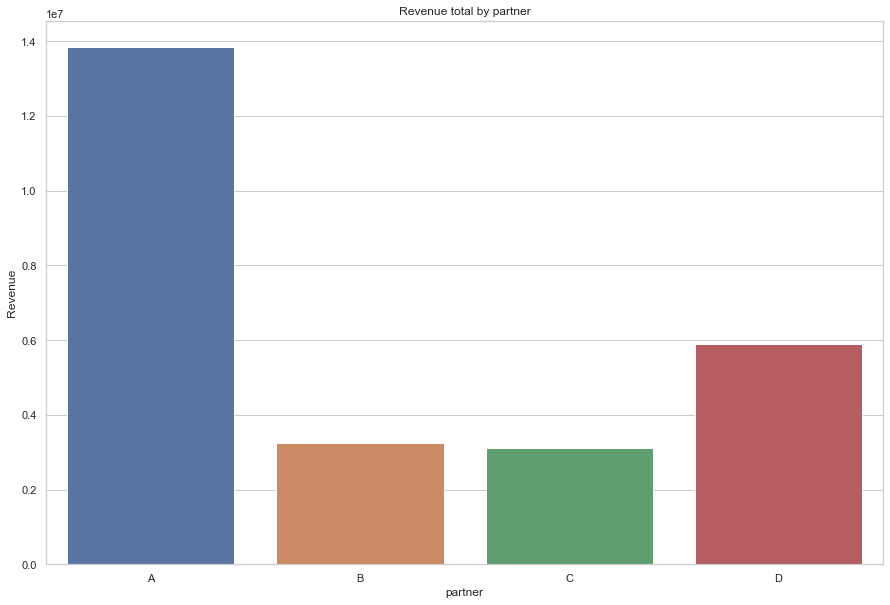

In [27]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="WL_partner", y="revenue", data=pivot_table_success)
plt.title('Revenue total by partner')
plt.xlabel('partner')
plt.ylabel('Revenue')
plt.show()

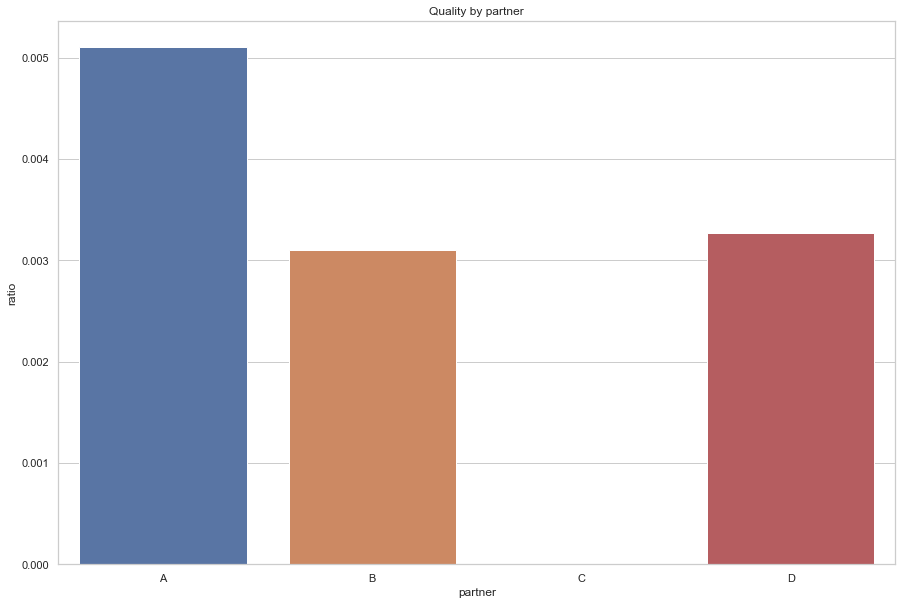

In [28]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="WL_partner", y="ratio", data=pivot_table_success)
plt.title('Quality by partner')
plt.xlabel('partner')
plt.ylabel('ratio')
plt.show()

### more analysis

In [29]:
booking.head()

,transaction_value,period,property_type,click_id
0,102.55000,period-6,alternative accomodation,324a9f0f-79b4-4e70-8e7f-da7b7680090f
1,188.90000,period-6,hotel,dd17ca00-2cd2-4112-b994-42377ec5b05a
2,161.93000,period-6,hotel,97692de6-614e-4934-a83d-f65a03b95922
3,683.66000,period-6,alternative accomodation,970d7c0c-bc2e-4198-98f6-7ee617459b49
4,333.21000,period-6,hotel,a0b5a803-5ad6-46d4-b100-2384a8b6ad6b


In [30]:
booking_info = booking.groupby('property_type').agg({'transaction_value': 'sum', 'click_id': 'count'}).reset_index()

In [31]:
check_of_crossings = pd.merge(clickout,booking, how = 'outer',  on='click_id')

In [32]:
check_of_crossings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834675 entries, 0 to 834674
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   WL_partner         834401 non-null  object 
 1   locale             834401 non-null  object 
 2   session_id         834401 non-null  float64
 3   hotel_id           834401 non-null  float64
 4   device_id          834401 non-null  float64
 5   departure_days     834401 non-null  float64
 6   arrival_days       834401 non-null  float64
 7   revenue            834401 non-null  float64
 8   click_id           834675 non-null  object 
 9   period             834401 non-null  object 
 10  success            3444 non-null    object 
 11  transaction_value  3443 non-null    float64
 12  period             3443 non-null    object 
 13  property_type      3443 non-null    object 
dtypes: float64(7), object(7)
memory usage: 95.5+ MB


In [33]:
check_of_crossings.head()

,WL_partner,locale,session_id,hotel_id,device_id,departure_days,arrival_days,revenue,click_id,period,success,transaction_value,period,property_type
0,A,US,2021112922610036480.00000,222240.00000,3.00000,283.00000,282.00000,31.70000,0cf74b91-8601-47f4-a7d7-e72ba56de031,period-6,True,NaN,NaN,NaN
1,A,US,2021112902030026752.00000,4118624.00000,27.00000,19.00000,18.00000,47.70000,09cbb121-32d3-4e64-ab40-63399d525b00,period-6,True,NaN,NaN,NaN
2,A,DE,2021112902090036480.00000,48544592.00000,42.00000,36.00000,27.00000,21.20000,2c1bddc6-284f-40d7-a54d-1a697d178499,period-6,True,NaN,NaN,NaN
3,A,UK,2021112919730105856.00000,3681740.00000,30.00000,32.00000,31.00000,9.95000,c08aff24-e634-4ad5-a9a4-6bc2dba5fb92,period-6,False,NaN,NaN,NaN
4,A,UK,2021112919730105856.00000,27251384.00000,30.00000,32.00000,31.00000,27.95000,87eca29d-3e06-4a85-8fac-3d66b594a221,period-6,True,NaN,NaN,NaN


In [34]:
check_of_crossings['stay_duration'] = check_of_crossings['departure_days'] - check_of_crossings['arrival_days']

In [35]:
pivot = check_of_crossings.groupby('property_type').agg({'transaction_value': 'sum', 'click_id': 'count', 'stay_duration': 'mean'}).reset_index()

In [36]:
pivot['avg_spend'] = pivot['transaction_value'] / pivot['click_id'] 
pivot['spend_per_day'] = pivot['avg_spend'] / pivot['stay_duration'] 

In [37]:
pivot

,property_type,transaction_value,click_id,stay_duration,avg_spend,spend_per_day
0,alternative accomodation,310532.06000,427,2.21809,727.24136,327.86901
1,hotel,895058.96000,2975,1.40790,300.86015,213.69361
2,other,39677.38000,41,2.11429,967.74098,457.71533


o, here we can see, that the biggest number of booking were made for hotels with least average spends per whole period of stay and the same for the daily average. Other category is the most expensive, as well as most rare. Stay duration is also lowest in hotel, while in alternative accomodation is longest. 

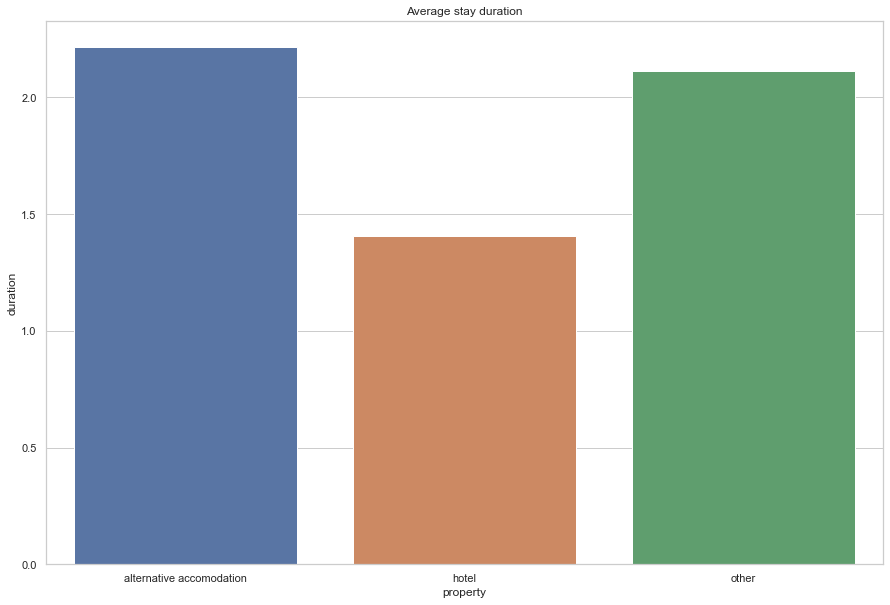

In [38]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="property_type", y="stay_duration", data=pivot)
plt.title('Average stay duration')
plt.xlabel('property')
plt.ylabel('duration')
plt.show()

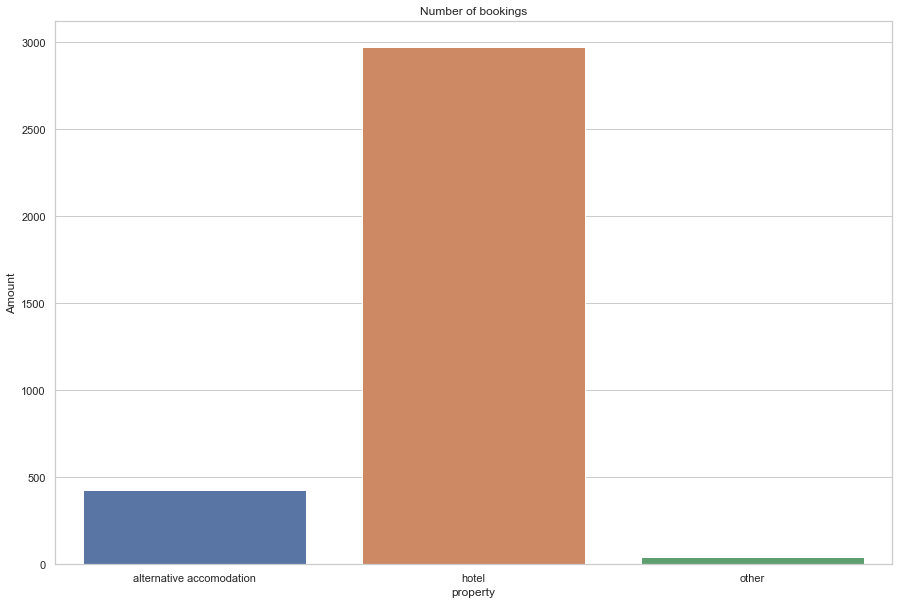

In [39]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="property_type", y="click_id", data=pivot)
plt.title('Number of bookings')
plt.xlabel('property')
plt.ylabel('Amount')
plt.show()

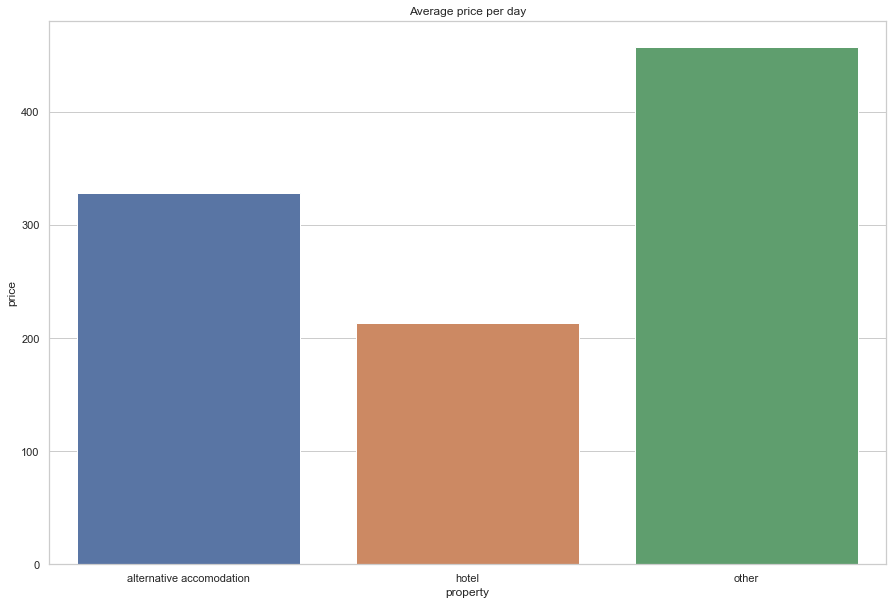

In [40]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="property_type", y="spend_per_day", data=pivot)
plt.title('Average price per day')
plt.xlabel('property')
plt.ylabel('price')
plt.show()

Let's do the same for the devce types, where we have 13 of them

In [41]:
check_of_crossings['device_id'].value_counts()

27.00000    316471
3.00000     163513
30.00000    152121
21.00000     85028
42.00000     36322
6.00000      30034
0.00000      24690
24.00000     14311
39.00000      6209
33.00000      3888
18.00000      1602
36.00000       208
9.00000          4
Name: device_id, dtype: int64

In [42]:
pivot_device = check_of_crossings.groupby('device_id').agg({'transaction_value': 'sum', 'click_id': 'count', 'stay_duration': 'mean', 'success': 'sum'}).reset_index()

In [43]:
pivot_device['avg_spend'] = pivot_device['transaction_value'] / pivot_device['click_id'] 
pivot_device['spend_per_day'] = pivot_device['avg_spend'] / pivot_device['stay_duration'] 
pivot_device['convertion'] = pivot_device['success'] / pivot_device['click_id'] 


In [44]:
pivot_device = pivot_device.sort_values(['click_id', 'transaction_value'], ascending = False)

In [45]:
pivot_device = pivot_device.rename(columns={'transaction_value': 'total_sum', 'click_id': 'number_of_clicks'})

In [46]:
list_of_values = pivot_device.columns.to_list()[1:]

In [47]:
pivot_device

,device_id,total_sum,number_of_clicks,stay_duration,success,avg_spend,spend_per_day,convertion
7,27.00000,261135.24000,316471,1.54331,1071,0.82515,0.53466,0.00338
1,3.00000,319853.58000,163513,1.58904,667,1.95614,1.23102,0.00408
8,30.00000,130545.22000,152121,1.48017,611,0.85817,0.57978,0.00402
5,21.00000,115913.12000,85028,1.59558,342,1.36323,0.85438,0.00402
12,42.00000,97663.74000,36322,1.64974,160,2.68883,1.62985,0.00441
2,6.00000,26264.95000,30034,1.61930,118,0.87451,0.54005,0.00393
0,0.00000,148319.94000,24690,1.68141,119,6.00729,3.57277,0.00482
6,24.00000,12159.04000,14311,1.61044,44,0.84963,0.52758,0.00307
11,39.00000,5848.67000,6209,1.60139,26,0.94197,0.58822,0.00419
9,33.00000,1332.11000,3888,1.55607,11,0.34262,0.22018,0.00283


What we can notice is following: 
    
    - device type 27 is the most popular and at the second place for total sum of all bookings and by far the best in number of bookings, but only on 10th place for the average duration of stay and and 9th for average spends and in the last part of convertion. 
    
    - there is device number 0, which is on the 3rd place for overall sum of payments, in the middle of total number of clicks, is on top for average spends and best convertion from click to booking.
    
    - tottaly worst device type is 9, alomost worst in all metrics 
    
    - device 42 is also showing pretty good metrics values. 

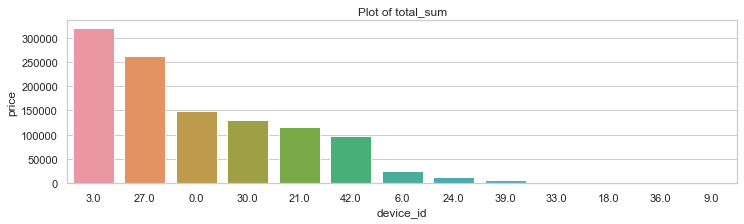

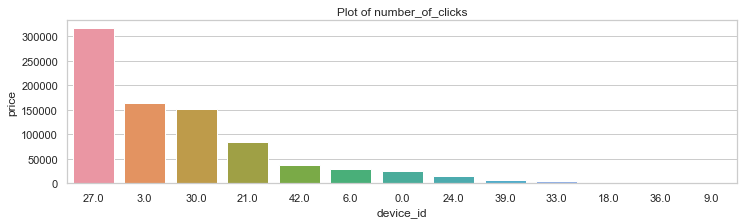

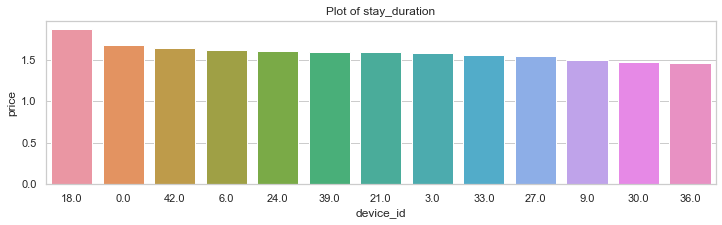

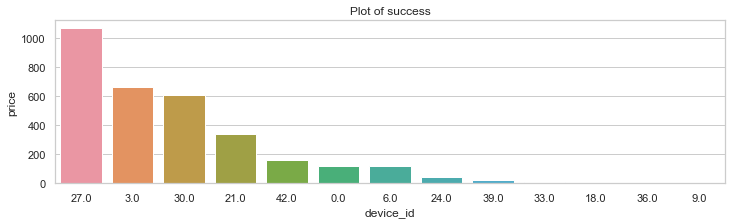

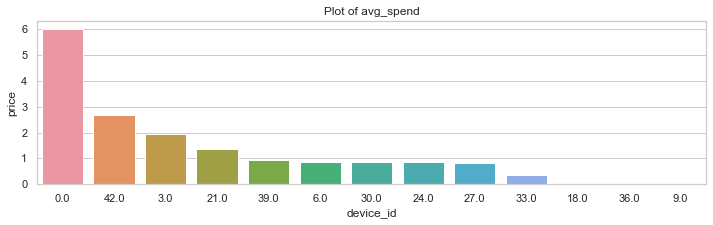

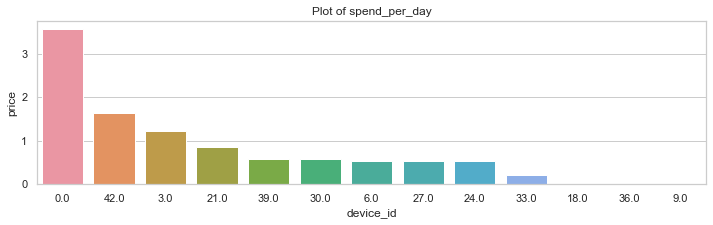

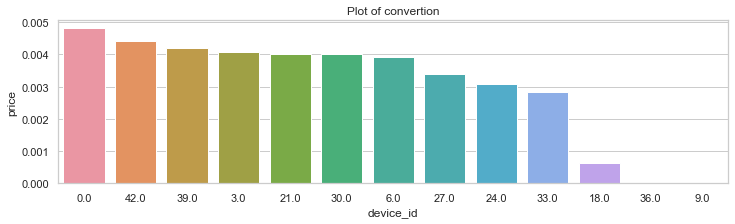

In [48]:
for i in list_of_values: 
    plt.figure(figsize=(12,3))
    ax = sns.barplot(x="device_id", y=i, data=pivot_device, order=pivot_device.sort_values(i, ascending=False).device_id)
    plt.title('Plot of {}'.format(i))
    plt.xlabel('device_id')
    plt.ylabel('price')
    plt.show()

# Conclusion


Why is this important for trivago and partners to search for a device perfomance?
first of all to correctly prioritize targeting for the ads, but in this case - it may also signals about wrong or not very comfortable or correct implimentation into whitelabels. Wrong view, with not loading map or without clear explanation may prevent from clicking on the map with proposals. At the same time, if this proposition with map is very far from the focus of visitor, visitor may also miss it.    

So, in order to improve perfomance, it may need several test with the ouput on each device, whuck struggles comparing to others in perfomance. They should be compared to the best and taking into account the posiible layout on the device all the mistakes could be eleminated. 

### Partners


The highest number of succesfull bookings are brought by parther A - 2210. Also the ratio of overall clicks and successfull booking is the highest for partner A. The RPC (revenue per click) is also highest for prtner A The wickest partner with low quality traffic is partner C - just 0 bookings from 100 000 views - terrible. 

### Devices

    
   - device type 27 is the most popular and at the second place for total sum of all bookings and by far the best in number of bookings, but only on 10th place for the average duration of stay and and 9th for average spends and in the last part of convertion. 
    
   - there is device number 0, which is on the 3rd place for overall sum of payments, in the middle of total number of clicks, is on top for average spends and best convertion from click to booking.
    
   - tottaly worst device type is 9, alomost worst in all metrics 
    
   - device 42 is also showing pretty good metrics values. 